# Lab 5 (Part A) : Support Vector Machines

<div class="alert alert-block alert-danger">

__IMPORTANT__ 
Please complete this Jupyter Notebook file and upload it to blackboard __before 28 February 2020__ evening.
</div>

In this Lab, you will first use support vector machines (SVM) with various example 2D datasets in "Part A", then you will have the oportunity to use SVM to build a spam classifier in "Part B". Before starting, we strongly recommend reading the slides of lecture 5.

In this first part of this Lab (Part A), you will be experimenting SVM with 2D datasets to help you gain an intuition of how SVM work and how to use a Gaussian kernel with SVM.

## 1. Example Dataset 1
We will begin by with a 2D example dataset (file `lab5data1.mat`) which can be separated by a linear boundary. The following Python code will load and plot the training data.

In this dataset, the positions of the positive examples (indicated with `1`) and the negative examples (indicated with `0`) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example on the far left at about `(0.1, 4.1)`. As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

X.shape: (51, 2) y.shape: (51,)


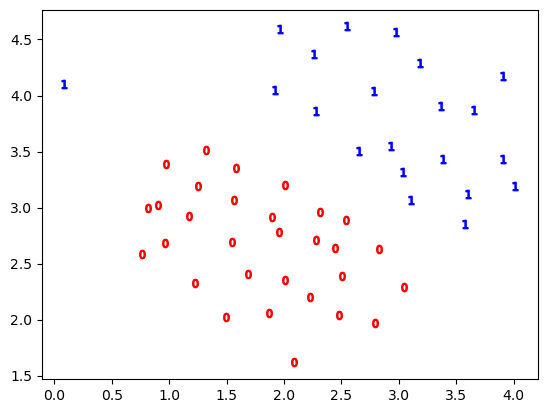

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy.io import loadmat

# Loading the dataset into X (inputs) and y (outputs)
mat = loadmat("datasets/lab5data1.mat")
X = mat["X"]
y = mat["y"].reshape(len(X))
print("X.shape:", X.shape, "y.shape:", y.shape)

fig, ax = plt.subplots()
X0, X1 = X[y==0], X[y==1]
ax.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
ax.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
plt.show()

Here, you will try using different values of the $C$ parameter with SVM. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

In order to understand this, the function `svm_train_and_plot(..)` provided below will run the SVM training (with a given parameter $C = 1$) using the sklearn library in Python. Read and run the code below before continuing.

In [3]:
%matplotlib inline 
from sklearn.svm import SVC

""" TODO:
Read the following code carefully then run it.
"""
print("Hello world")
def svm_train_and_plot(X, y, C):
    clf = SVC(C=C, kernel="linear").fit(X, y) # Training
    theta = np.concatenate([clf.intercept_, clf.coef_[0]]) # The parameters vector theta
    
    # Plotting the dataset and linear decision boundary
    fig, ax = plt.subplots()
    X0, X1 = X[y==0], X[y==1]
    ax.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
    ax.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
    
    plot_x1 = np.linspace(0, 4)
    plot_x2 = - (theta[0] + theta[1] * plot_x1) / theta[2]
    ax.plot(plot_x1, plot_x2, color="green")
    
    ax.set_title("SVM Decision Boundary with C = {}".format(C))
    plt.show()


    

Hello world


In the code below, your task is to call the function `svm_train_and_plot(X, y, C)` and try different values of $C$ on this dataset (e.g. try a least $C=1$ and $C=100$) and compare the results.

**Note**: Most SVM libraries (including sklearn.svm.LinearSVC) automatically add the extra feature $x_0 = 1$ for you and automatically take care of learning the intercept term $\theta_0$. So when passing your training data to train SVM, there is no need to add this extra feature $x_0 = 1$ yourself. In particular, in Python your code should be working with training examples $x \in \mathbb{R}^d$ (rather than $x \in \mathbb{R}^{d+1}$); for example, in the first example dataset $x \in \mathbb{R}^{2}$.

When $C = 1$, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the outlier data-point on the far left (see the left plot in the following figure). When $C = 100$, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data - it overfits (see the right plot in the following figure).

<img src="imgs/svmData1CLab5.png" width="800px" />

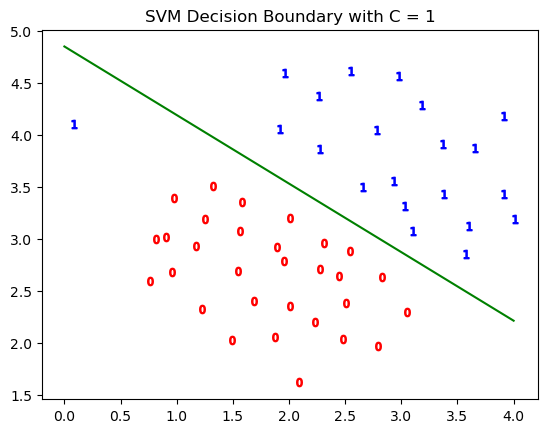

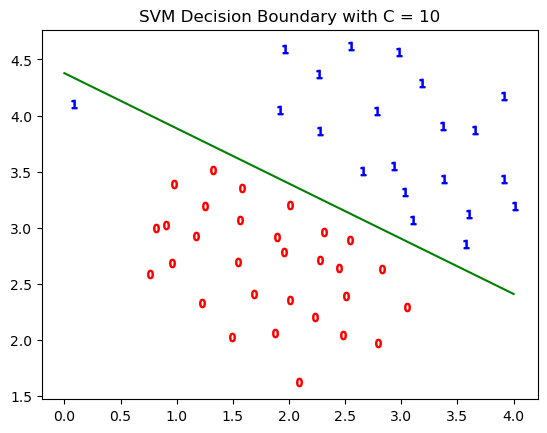

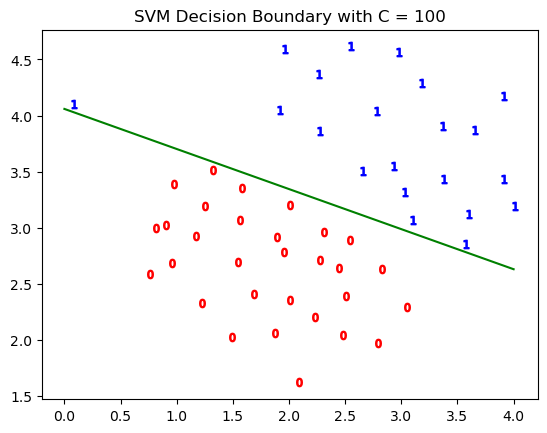

In [4]:
""" TODO:
Call svm_train_and_plot(X, y, C) with different values of C (e.g. 1, 10, 100) and compare the resulting plots.
"""
# svm_train_and_plot(...)
# svm_train_and_plot(...)
# svm_train_and_plot(...)
C_range = np.array([1 , 10 , 100])

for C in C_range:
    svm_train_and_plot(X, y, C)


## 2. SVM with Gaussian Kernels
In this part of the exercise, you will be using SVM to do nonlinear classification. In particular, you will be using SVM with Gaussian kernels on datasets that are not linearly separable.

### 2.1. Gaussian Kernel
To find nonlinear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function between a pair of examples $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to $0$) as the examples are further apart (or more distant). Note: we have seen how this Gaussian kernel function looks like when we studied Kernel Regression un a previous lecture.

You should now complete the code below to compute the Gaussian kernel between two examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel function is defined as:

$$
K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp{\left (-\frac{{\left \| x^{(i)} - x^{(j)} \right \|}^2}{2 \sigma^2} \right )} = \exp{ \left ( - \frac{ \sum_{k=1}^{n} (x_k^{(i)} - x_k^{(j)})^2 }{2 \sigma^2} \right ) }
$$


In [5]:
""" TODO:
Write the definition of the gaussian kernel function of between two vectors u and v using a bandwidth sigma.
"""
def gaussianKernel(u, v, sigma):
    return np.exp(- np.square(np.linalg.norm(u - v)) / (2 * np.square(sigma) ))


""" TODO:
Test your gaussianKernel(..) function using the two vectors np.array([1,2]), np.array([0,3]) 
and the bandwidth sigma=1. You should expect to see a value of about 0.36787944.
"""
# gaussianKernel(...)
u = np.array([1 ,2])
v = np.array([0 ,3])

print(gaussianKernel(u , v , sigma= 1))


0.3678794411714422


### 2.2. Example Dataset 2
The following Python code will load and plot dataset 2. Run the code and check the resulting figure.

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with SVM, you will be able to learn a nonlinear decision boundary that can perform reasonably well for the dataset.

X.shape: (863, 2) y.shape: (863,)


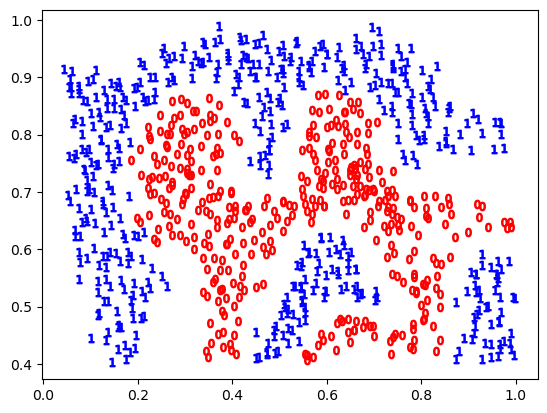

In [6]:
# The old (previous) variables X and y will be replaced with the new dataset.

mat = loadmat("datasets/lab5data2.mat")
X = mat["X"]
y = mat["y"].reshape(len(X))
print("X.shape:", X.shape, "y.shape:", y.shape)

fig, ax = plt.subplots()
X0, X1 = X[y==0], X[y==1]
ax.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
ax.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
plt.show()

To make SVM training faster to run, we are not going to use the `gaussianKernel(..)` function that you implemented previously. We will use a faster implementation of the gaussian kernel which is already implemented in `sklearn.svm import SVC`. Now, run the following code where a function `nonlinear_svm_train_and_plot(X, y, C, sigma)` is provided. This function trains a nonlinear SVM on the training dataset `X, y`, using the specified `C` and a gaussian kernel parametrized by the specified `sigma` ($\sigma$). Just run the code, you DO NOT have to fully understand how the plotting is done inside the function `nonlinear_svm_train_and_plot(..)` but you can still read it and benefit from it if you want.

**NOTE:** When the function `nonlinear_svm_train_and_plot(..)` is called, it might take some time (few seconds) before it finishes running and produces the plot.

Please wait. This might take some time (few seconds) ...


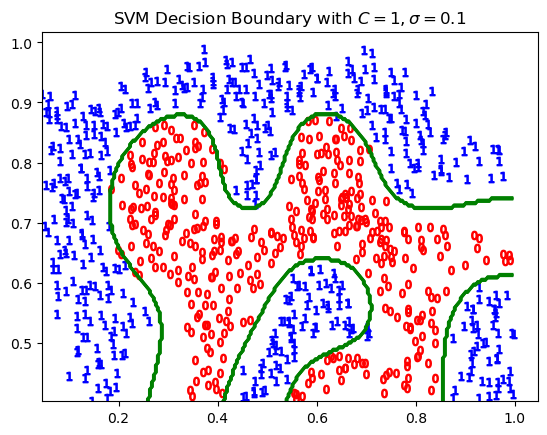

In [7]:
from sklearn.svm import SVC

def nonlinear_svm_train_and_plot(X, y, C, sigma):
    print("Please wait. This might take some time (few seconds) ...")
    
    gamma = 1 / (2 * sigma**2)
    clf = SVC(C=C, kernel="rbf", gamma=gamma).fit(X, y) # Training
    
    # Plotting the dataset and nonlinear decision boundary
    fig, ax = plt.subplots()
    X0, X1 = X[y==0], X[y==1]
    ax.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
    ax.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
    
    x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
    x2_min, x2_max = np.min(X[:, 1]), np.max(X[:, 1])
    plot_x1, plot_x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.004), np.arange(x2_min, x2_max, 0.004))
    Z = clf.predict(np.c_[plot_x1.ravel(), plot_x2.ravel()])
    Z = Z.reshape(plot_x1.shape)
    
    ax.contour(plot_x1, plot_x2, Z, colors="green")
    
    ax.set_title("SVM Decision Boundary with $C = {}, \sigma = {}$".format(C, sigma))
    plt.show()


# We call here our function defined above, with C=1 and sigma = 0.1
nonlinear_svm_train_and_plot(X, y, C = 1, sigma = 0.1)


In the code below, your task is to call the function `nonlinear_svm_train_and_plot(X, y, C, sigma)` and try different values of `sigma` on this dataset, e.g. $\sigma=0.01, \sigma=0.1$, and \sigma=0.5$ (you can, of course, try other values as well).

The following figure shows the decision boundary found by the SVM with $C=1$ and a Gaussian kernel with $\sigma = 0.01$, $\sigma = 0.1$, $\sigma = 0.5$. When $\sigma$ is too small (e.g. 0.01 for this dataset), you can see that the decision boundary is very complex and is able to separate all of the positive and negative examples correctly; but migt not generalize well to new unseen data (i.e. overfitting occurs). With $\sigma = 0.1$, the decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well. However, when $\sigma$ is too large (e.g. 0.5 for this dataset), then it might result in underfitting, as you can see from the following figure (the decision boundary is not able to separate the two classes well enough).

<img src="imgs/svmData2SigmaLab5.png" />

Please wait. This might take some time (few seconds) ...


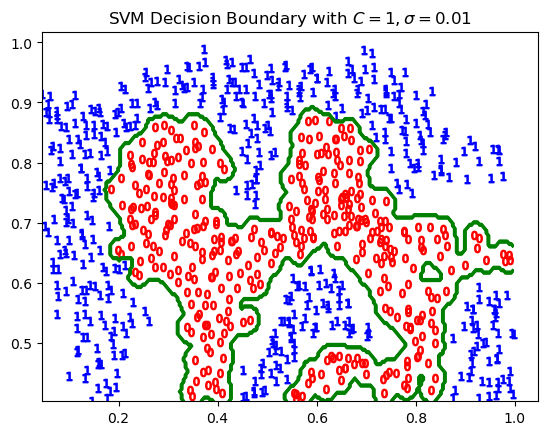

Please wait. This might take some time (few seconds) ...


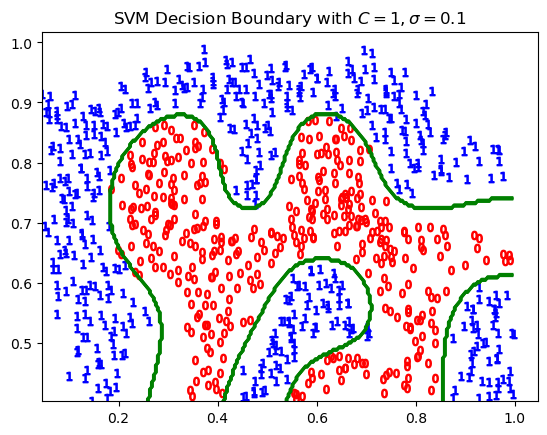

Please wait. This might take some time (few seconds) ...


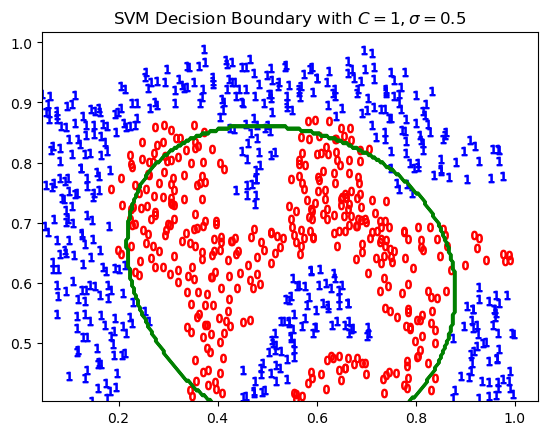

In [8]:
""" TODO:
Call nonlinear_svm_train_and_plot(X, y, C, sigma) with different values of sigma and compare the resulting plots.
"""
# nonlinear_svm_train_and_plot(X, y, C = 1, sigma = 0.01)
# nonlinear_svm_train_and_plot(X, y, C = 1, sigma = 0.1)
# nonlinear_svm_train_and_plot(X, y, C = 1, sigma = 0.5)

sigma_range = np.array([0.01 , 0.1 , 0.5])

for sigma in sigma_range :
    nonlinear_svm_train_and_plot(X , y , C = 1 , sigma = sigma )

### 2.3. Example Dataset 3
In this section, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The following Python code will load and display a third dataset from `lab5data3.mat`. In this provided dataset, you are given the variables `X, y, Xval, yval`. Run the following code to load and display the dataset.

X.shape: (211, 2) y.shape: (211,)
Xval.shape: (211, 2) yval.shape: (211,)


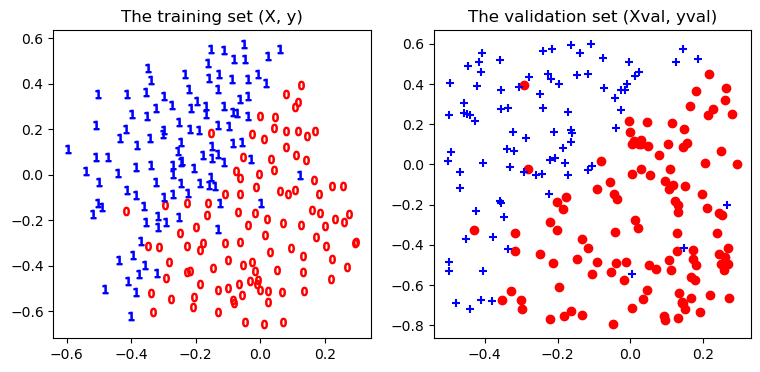

In [9]:
# The old (previous) variables X and y will be replaced with the new dataset.

mat = loadmat("datasets/lab5data3.mat")
X = mat["X"]
y = mat["y"].reshape(len(X))
Xval = mat["Xval"]
yval = mat["yval"].reshape(len(Xval))

print("X.shape:", X.shape, "y.shape:", y.shape)
print("Xval.shape:", X.shape, "yval.shape:", y.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
X0, X1 = X[y==0], X[y==1]
ax1.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
ax1.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
ax1.set_title("The training set (X, y)")

Xval0, Xval1 = Xval[yval==0], Xval[yval==1]
ax2.scatter(Xval0[:, 0], Xval0[:, 1], marker="o", color="red")
ax2.scatter(Xval1[:, 0], Xval1[:, 1], marker="+", color="blue")
ax2.set_title("The validation set (Xval, yval)")
plt.show()

Here, you will be using the SVM with the Gaussian kernel on this dataset. In the code provided below, the function `train_nonlinear_svm(X, y, C, sigma)` trains the SVM classifier using the training set $(X, y)$ and the provided parameters $C$ and $\sigma$. The function returns an object `clf` that you can use later to make predictions on a new dataset such as `Xval` (using `clf.predict(Xval)`).

Your task is to use the validation set `Xval, yval` to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example, if you try each of the 8 values listed above for $C$ and for $\sigma$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different SVM models.

After you have determined the best $C$ and $\sigma$ parameters to use, call the function `nonlinear_svm_train_and_plot(..)` using the best $C$ and $\sigma$ to plot the corresponding SVM decision boundary. For our best parameters, the SVM returned a decision boundary shown in the following figure.
<img src="imgs/bestCandSigmaLab5.png" width="400px" />

**Implementation Tip**: When implementing the hyperparameters tunning to select the best $C$ and $\sigma$ to use, you need to evaluate the error on the validation set. Recall that for classification, the accuracy is defined as the fraction of the validation examples that were classified correctly. In Python, you can compute this accuracy (in percentage %) using `np.mean(predictions == yval) * 100`, where `predictions` is an array containing all the predictions from the SVM, and `yval` are the true labels from the validation set. You can use `clf.predict(Xval)` to generate the predictions for the validation set.

Highest accuracy is : 0.965
C best is : 1.0
sigma best is 0.1
Please wait. This might take some time (few seconds) ...


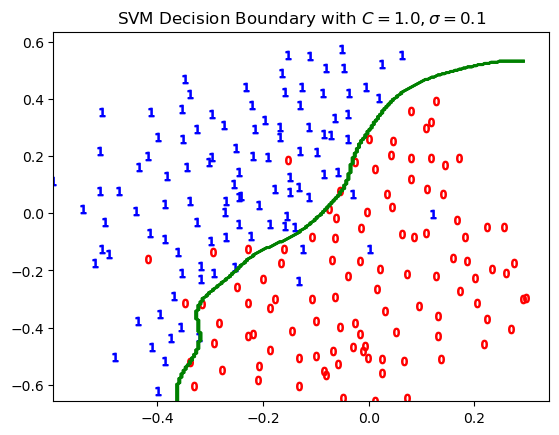

In [25]:
# This function trains a nonlinear svm model and returns an object clf 
# that you can use later to make predictions. Read this function:
def train_nonlinear_svm(X, y, C, sigma):
    gamma = 1 / (2 * sigma**2)
    clf = SVC(C=C, kernel="rbf", gamma=gamma).fit(X, y) # Training SVM
    return clf


def predict(clf, X):
    return clf.predict(X)  # Use the single classifier to predict

""" TODO:
Write code here to use the validation set Xval, yval to determine the best C and sigma parameter to use.
Try using values of C and sigma from this range: [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30].
"""

C_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C_range = np.array(C_range)
sigma_range = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

accuracy_max = 0 
C_best = 0 
sigma_best = 0

# print(Xval.shape)

error_min = 100 
for sigma in sigma_range :
    for C_para in C_range:
        clfs = train_nonlinear_svm(X, y, C_para, sigma)
        y_pred = predict(clf = clfs , X= Xval)
        acc = np.mean(y_pred == yval)
        if acc > accuracy_max:
            accuracy_max = acc
            C_best = C_para
            sigma_best = sigma

# ...
# C_best, sigma_best = ...
print(f"Highest accuracy is : {accuracy_max}")
print(f"C best is : {C_best}")
print(f"sigma best is {sigma_best}")


""" TODO:
After you have determined the best C and sigma parameters to use, 
call the function nonlinear_svm_train_and_plot(X, y, C_best, sigma_best) 
using the best C and sigma to plot the corresponding SVM decision boundary.
"""
nonlinear_svm_train_and_plot(X, y, C_best, sigma_best)
